In [1]:
import pandas as pd
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as nd
import shutil
from sklearn.model_selection import train_test_split

# Dataset

## CSV file

In [3]:
dir = '/kaggle/input/fetal-head-thesis/training_set/training_set/'
csv_file='/kaggle/input/fetal-head-thesis/training_set_pixel_size_and_HC.csv'

In [4]:
HC_df=pd.read_csv(csv_file)
len(HC_df)

999

In [50]:
HC_df = HC_df[['filename','pixel size(mm)','head circumference (mm)']].drop_duplicates()
len(HC_df)

999

In [5]:
HC_df=HC_df[['filename','pixel size(mm)','head circumference (mm)']].copy().rename(columns={'pixel size(mm)':'pixel_size','head circumference (mm)':'HC'})

In [6]:
HC_df.describe()

,pixel_size,HC
count,999.000000,999.000000
mean,0.139846,174.383093
std,0.053005,65.282061
min,0.049415,44.300000
25%,0.108801,153.600000
50%,0.128357,174.060000
75%,0.157678,189.825000
max,0.393280,346.400000


In [7]:
images = HC_df[HC_df.filename.str.contains("_HC")]
len(images)

806

In [8]:
HC_df.filename

0      000_HC.png
1      001_HC.png
2      002_HC.png
3      003_HC.png
4      004_HC.png
          ...    
994    801_HC.png
995    802_HC.png
996    803_HC.png
997    804_HC.png
998    805_HC.png
Name: filename, Length: 999, dtype: object

In [68]:
for f in os.listdir(DST): 
    if not HC_df.filename.tolist():
        print(f)

In [18]:
images.describe()

,pixel_size,HC
count,806.000000,806.000000
mean,0.138848,173.971600
std,0.051949,64.761672
min,0.049415,44.300000
25%,0.108393,153.925000
50%,0.128191,174.225000
75%,0.157101,188.797500
max,0.393280,346.400000


(array([1]), [Text(1, 0, 'HC')])

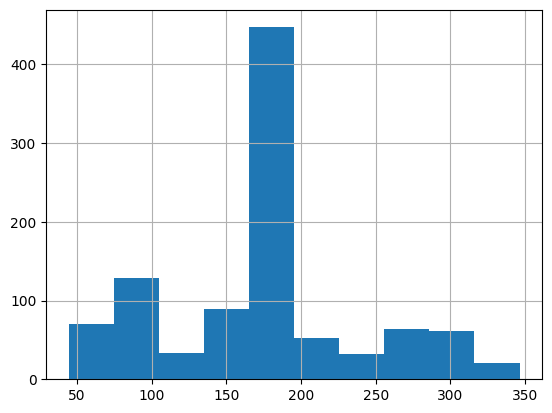

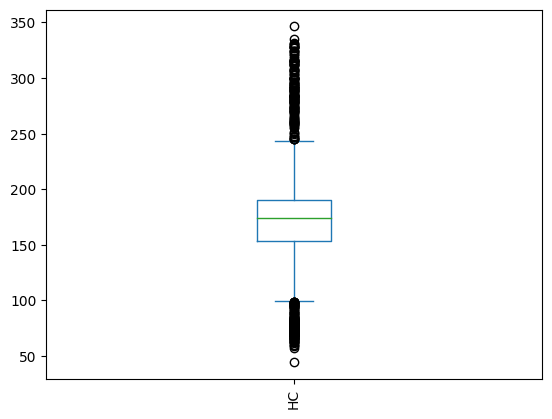

In [20]:
 # plot a histogram  
import matplotlib.pyplot as plt 
HC_df['HC'].hist(bins=10)
columns = ['HC']
HC_df[columns].plot.box()
plt.xticks(rotation='vertical')

## Annotations

In [12]:
import shutil
import os 

SRC = r"/kaggle/input/fetal-head-thesis/training_set/training_set"
Anno_dir = r"/kaggle/working/Annotations"
Img_dir = r"/kaggle/working/Images"

if not os.path.isdir(Anno_dir):
    os.makedirs(Anno_dir, exist_ok=True)
if not os.path.isdir(Img_dir):
    os.makedirs(Img_dir, exist_ok=True)
    
for file_name in os.listdir(SRC):
    # if it is one of the files we are looking for
    if "Annotation" in file_name:
        # if file doesn't exist copy the file
        if not os.path.isfile(Anno_dir + "/" + file_name):
            # copy the file with the metadata
            shutil.copy2(SRC + "/" + file_name, Anno_dir + "/")
    else: 
        if not os.path.isfile(Img_dir + "/" + file_name):
            # copy the file with the metadata
            shutil.copy2(SRC + "/" + file_name, Img_dir + "/")

In [187]:
len([f for f in os.listdir(Anno_dir)])

999

In [188]:
len([f for f in os.listdir(Img_dir)])

999

Text(0.5, 1.0, '570_2HC.png')

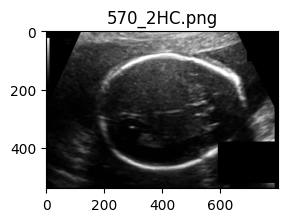

In [189]:
fname = '570_2HC.png'
image= cv2.imread(os.path.join(Img_dir,fname),cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(3,3))
plt.imshow(image,cmap='gray')
plt.title(fname)

In [17]:
image.shape

(540, 800)

In [4]:
def getAnnoName(current_filename):
    new_filename = current_filename.replace(".png", "_Annotation.png")
    return new_filename

Text(0.5, 1.0, '570_2HC.png')

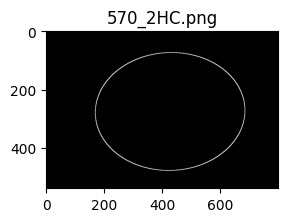

In [20]:
fname = '570_2HC.png'
image= cv2.imread(os.path.join(Anno_dir,getAnnoName(fname)),cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(3,3))
plt.imshow(image,cmap='gray')
plt.title(fname)

## Mask

In [56]:
def fill_poly(fname):
    img = cv2.imread(os.path.join(Anno_dir, fname), cv2.COLOR_BGR2GRAY)
    thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
    cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    output = cv2.fillPoly(img, cnts, [255,255,255])
    return output 

In [55]:
mask.shape

(4, 1)

In [94]:
!rm -rf /kaggle/working/Mask

In [95]:
Mask_dir = r"/kaggle/working/Mask/"

if not os.path.isdir(Mask_dir):
    os.makedirs(Mask_dir, exist_ok=True)
    
for file in os.listdir(Anno_dir): 
    newName = os.path.join(Mask_dir, file).replace('Annotation','Mask')
    cv2.imwrite(newName, fill_poly(file))

In [60]:
len([f for f in os.listdir(Mask_dir)])

999

In [96]:
os.listdir(Mask_dir)[1]

'139_HC_Mask.png'

In [10]:
mask.shape

(540, 800)

In [61]:
def getMask(current_filename):
    new_filename = current_filename.replace(".png", "_Mask.png")
    return new_filename

Text(0.5, 1.0, '570_2HC.png')

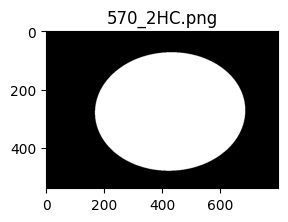

In [62]:
mask = cv2.imread(os.path.join(Mask_dir,getMask(fname)),cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(3,3))
plt.imshow(mask,cmap='gray')
plt.title(fname)

## Visualize

In [98]:
def plot(fname):
    image = cv2.imread(os.path.join(Img_dir,fname),cv2.COLOR_BGR2GRAY)
    anno = cv2.imread(os.path.join(Anno_dir,getAnnoName(fname)),cv2.COLOR_BGR2GRAY)
    mask = cv2.imread(os.path.join(Mask_dir,getMask(fname)),cv2.COLOR_BGR2GRAY)
                      
    f, a = plt.subplots(1,3,figsize=(5,5))
    a[0].imshow(image,cmap='gray')
    a[0].set_ylabel(fname)
    a[0].set_xticks([])
    a[0].set_yticks([])
    a[0].set_title('Image')
                
    a[1].imshow(anno,cmap='gray')
    a[1].axis('off')
    a[1].set_title('Annotation')
                
    a[2].imshow(mask,cmap='gray')
    a[2].axis('off')
    a[2].set_title('Mask')
                      
    plt.tight_layout()
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()

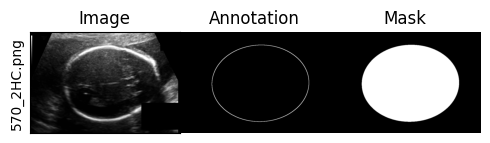

In [99]:
plot(fname)

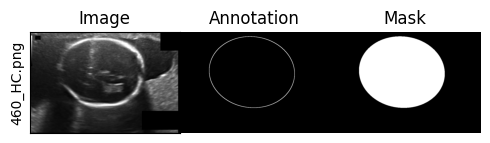

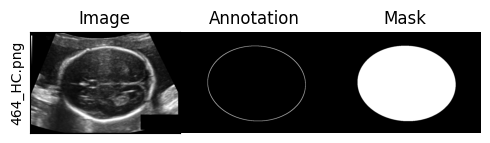

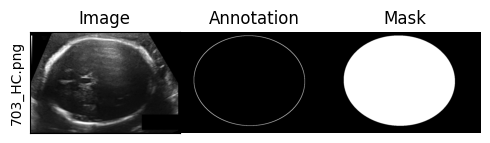

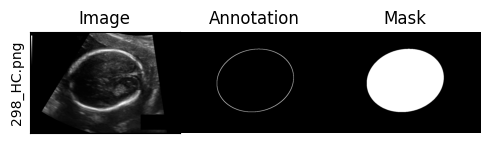

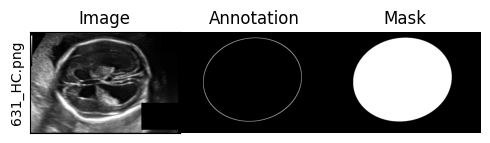

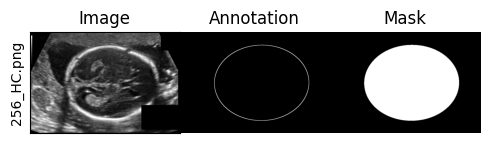

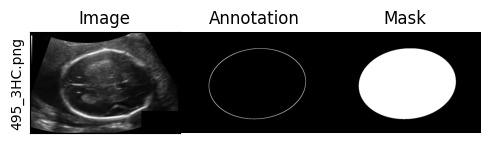

In [91]:
import random 
random_image = random.sample(range(750), 7)
for image in random_image:
    plot(os.listdir(Img_dir)[image])

# Model

## prepare data

In [100]:
import glob
masks = glob.glob(Mask_dir+'/*')
masks[:5]

['/kaggle/working/Mask/702_HC_Mask.png',
 '/kaggle/working/Mask/139_HC_Mask.png',
 '/kaggle/working/Mask/326_HC_Mask.png',
 '/kaggle/working/Mask/495_4HC_Mask.png',
 '/kaggle/working/Mask/438_HC_Mask.png']

In [107]:
images = [mask_images.replace("_Mask", "").replace("/kaggle/working/Mask", "/kaggle/input/annotations/Images") for mask_images in masks]
images[:5]

['/kaggle/input/annotations/Images/702_HC.png',
 '/kaggle/input/annotations/Images/139_HC.png',
 '/kaggle/input/annotations/Images/326_HC.png',
 '/kaggle/input/annotations/Images/495_4HC.png',
 '/kaggle/input/annotations/Images/438_HC.png']

In [108]:
series = list(zip(images, masks))
series[:5]

[('/kaggle/input/annotations/Images/702_HC.png',
  '/kaggle/working/Mask/702_HC_Mask.png'),
 ('/kaggle/input/annotations/Images/139_HC.png',
  '/kaggle/working/Mask/139_HC_Mask.png'),
 ('/kaggle/input/annotations/Images/326_HC.png',
  '/kaggle/working/Mask/326_HC_Mask.png'),
 ('/kaggle/input/annotations/Images/495_4HC.png',
  '/kaggle/working/Mask/495_4HC_Mask.png'),
 ('/kaggle/input/annotations/Images/438_HC.png',
  '/kaggle/working/Mask/438_HC_Mask.png')]

In [109]:
dataset = pd.DataFrame(series, columns=['image_path', 'mask_path'])
dataset.head()

,image_path,mask_path
0,/kaggle/input/annotations/Images/702_HC.png,/kaggle/working/Mask/702_HC_Mask.png
1,/kaggle/input/annotations/Images/139_HC.png,/kaggle/working/Mask/139_HC_Mask.png
2,/kaggle/input/annotations/Images/326_HC.png,/kaggle/working/Mask/326_HC_Mask.png
3,/kaggle/input/annotations/Images/495_4HC.png,/kaggle/working/Mask/495_4HC_Mask.png
4,/kaggle/input/annotations/Images/438_HC.png,/kaggle/working/Mask/438_HC_Mask.png


In [110]:
train, test= train_test_split(dataset, test_size=0.25)

In [79]:
print(f"Train shape: {train.shape}")
print(f"Test shape: {test.shape}")

Train shape: (749, 2)
Test shape: (250, 2)


In [111]:
import torch
from torch.utils.data import Dataset
from torchvision import transforms
from PIL import Image

class CustomImageMaskDataset(Dataset):
    np.random.seed(42)
    torch.manual_seed(42)
    def __init__(self, dataframe, image_transform=None):
        self.data = dataframe
        self.image_transform = image_transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        image_path = self.data.iloc[idx]['image_path']
        mask_path = self.data.iloc[idx]['mask_path']

        image = Image.open(image_path).convert('L') 
        mask = Image.open(mask_path).convert('L')

        if self.image_transform:
            image = self.image_transform(image)
            mask = self.image_transform(mask)

        return image, mask

# Define transformations with selected augmentation techniques and normalization for grayscale
image_size = 128
    
train_transforms = transforms.Compose([
    transforms.Resize([image_size, image_size]),
    transforms.ToTensor(),
])

val_transforms = transforms.Compose([
    transforms.Resize([image_size, image_size]),
    transforms.ToTensor(),
])


# Create datasets
train_dataset = CustomImageMaskDataset(train, train_transforms)
test_dataset = CustomImageMaskDataset(test, val_transforms)

# Create DataLoaders
batch_size = 16
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [112]:
for batch in train_dataloader:
    # Assuming your dataset returns a tuple (inputs, targets)
    inputs, targets = batch
    
    # Print the shapes
    print("Input shape:", inputs.shape)
    print("Target shape:", targets.shape)
    break

Input shape: torch.Size([16, 1, 128, 128])
Target shape: torch.Size([16, 1, 128, 128])


In [113]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [114]:
device

device(type='cuda', index=0)

## model

In [116]:
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch
import torch.optim as optim
torch.cuda.set_device(0)
from torch.utils.data import Dataset
from PIL import Image
import torch.nn as nn

In [117]:
class ConvBlock(nn.Module):
    def __init__(self, input_channel, out_channel, dropout):
        super(ConvBlock, self).__init__()
        self.conv2d_1 = nn.Conv2d(input_channel, out_channel, kernel_size=3, padding=1)
        self.batchnorm_1 = nn.BatchNorm2d(out_channel)
        self.relu_1 = nn.ReLU()
        
        self.dropout = nn.Dropout(dropout)
        
        self.conv2d_2 = nn.Conv2d(out_channel, out_channel, kernel_size=3, padding=1)
        self.batchnorm_2 = nn.BatchNorm2d(out_channel)
        self.relu_2 = nn.ReLU()

    def forward(self, x):
        x = self.conv2d_1(x)
        x = self.batchnorm_1(x)
        x = self.relu_1(x)
        
        x = self.dropout(x)
        
        x = self.conv2d_2(x)
        x = self.batchnorm_2(x)
        x = self.relu_2(x)

        return x

class Encoder(nn.Module):
    def __init__(self, input_channel, out_channel, dropout):
        super(Encoder, self).__init__()
        self.conv2d_1 = ConvBlock(input_channel, out_channel, dropout)
        self.maxpool = nn.MaxPool2d((2,2))
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, x):
        x = self.conv2d_1(x)
        p = self.maxpool(x)
        p = self.dropout(p)

        return x, p

class Decoder(nn.Module):
    def __init__(self, input_channel, output_channel, dropout):
        super(Decoder, self).__init__()
        self.conv_t = nn.ConvTranspose2d(input_channel, output_channel, stride=2, kernel_size=2)
        self.conv2d_1 = ConvBlock(output_channel*2, output_channel, dropout)
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, x, skip):
        x = self.conv_t(x)
        x = torch.cat([x, skip], dim=1)
        x = self.dropout(x)
        x = self.conv2d_1(x)

        return x

In [118]:
class Unet(nn.Module):

    def __init__(self, input_channel=1):
        super().__init__()
        self.encoder_1 = Encoder(input_channel, 64, 0.07)
        self.encoder_2 = Encoder(64, 128, 0.08)
        self.encoder_3 = Encoder(128, 256, 0.09)
        self.encoder_4 = Encoder(256, 512, 0.1)

        self.conv_block = ConvBlock(512, 1024, 0.11)

        self.decoder_1 = Decoder(1024, 512, 0.1)
        self.decoder_2 = Decoder(512, 256, 0.09)
        self.decoder_3 = Decoder(256, 128, 0.08)
        self.decoder_4 = Decoder(128, 64, 0.07)

        self.cls = nn.Conv2d(64, 1, kernel_size=1, padding=0)
        self.relu = nn.Sigmoid() 

    def forward(self, x):

        """ ------ Encoder ------"""
        x1, p1 = self.encoder_1(x)
        x2, p2 = self.encoder_2(p1)
        x3, p3 = self.encoder_3(p2)
        x4, p4 = self.encoder_4(p3)

        """ ------ BottleNeck ------"""
        x5 = self.conv_block(p4)

        """ ------ Decoder ------"""
        x6 = self.decoder_1(x5, x4)
        x7 = self.decoder_2(x6, x3)
        x8 = self.decoder_3(x7, x2)
        x9 = self.decoder_4(x8, x1)
        
        """ ------ Final Layer ------"""
        x_final = self.cls(x9)
        x_final = self.relu(x_final)

        return x_final

## train

In [119]:
class Trainer:
    def __init__(self, model, num_epochs, optimizer, criterion, device):
        self.num_epochs = num_epochs
        self.optimizer = optimizer
        self.criterion = criterion
        self.model = model
        self.device = device
        self.log_interval = 15

        # Lists to store training and validation metrics
        self.train_losses = []
        self.val_losses = []
        self.train_dices = []
        self.val_dices = []

        # Best model and its metrics
        self.best_model = None
        self.best_dice = 0.0
        self.best_epoch = 0

    def dice_coeff(self, predicted, target, smooth=1e-5):
        intersection = torch.sum(predicted * target)
        union = torch.sum(predicted) + torch.sum(target)
        dice = (2. * intersection + smooth) / (union + smooth)
        return dice
    
    def iou(self, pred_mask, true_mask):
        intersection = torch.logical_and(pred_mask, true_mask).sum().item()
        union = torch.logical_or(pred_mask, true_mask).sum().item()
        iou_score = intersection / union if union != 0 else 0.0
        return iou_score

    def save_best_model(self, epoch, dice):
        if dice > self.best_dice:
            self.best_dice = dice
            self.best_epoch = epoch
            self.best_model = self.model.state_dict()

            filename = f'best_model_epoch{epoch}_dice{dice:.4f}.pth'
            torch.save(self.best_model, filename)

    def train(self, train_loader, val_loader):
        for epoch in range(self.num_epochs):
            train_loss = 0.0
            val_loss = 0.0
            train_dice = 0.0
            val_dice = 0.0

            # Training loop
            for i, (images, masks) in enumerate(train_loader):
                images, masks = images.to(self.device), masks.to(self.device)

                self.model.train()
                self.optimizer.zero_grad()

                outputs = self.model(images)
                loss = self.criterion(outputs, masks)
                dice = self.dice_coeff(outputs, masks)

                loss.backward()
                self.optimizer.step()

                train_loss += loss.item()
                train_dice += dice

                if (i + 1) % self.log_interval == 0:
                    print(f'Epoch [{epoch + 1}/{self.num_epochs}], Step [{i + 1}/{len(train_loader)}], Loss: {loss.item():.4f}, Dice Coef: {dice:.4f}')

            # Validation loop
            self.model.eval()
            with torch.no_grad():
                for images, masks in val_loader:
                    images, masks = images.to(self.device), masks.to(self.device)
                    outputs = self.model(images)
                    val_loss += self.criterion(outputs, masks).item()
                    val_dice += self.dice_coeff(outputs, masks)

            avg_train_loss = train_loss / len(train_loader)
            avg_val_loss = val_loss / len(val_loader)
            avg_train_dice = train_dice / len(train_loader)
            avg_val_dice = val_dice / len(val_loader)

            print(f'Epoch [{epoch + 1}/{self.num_epochs}], Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}')
            print(f'Epoch [{epoch + 1}/{self.num_epochs}], Train Dice: {avg_train_dice:.4f}, Val Dice: {avg_val_dice:.4f}')

            # Save metrics
            self.train_losses.append(avg_train_loss)
            self.val_losses.append(avg_val_loss)
            self.train_dices.append(avg_train_dice)
            self.val_dices.append(avg_val_dice)

            # Save best model
            self.save_best_model(epoch + 1, avg_val_dice)
    def get_metrics(self):
        return {
            'train_losses': self.train_losses,
            'val_losses': self.val_losses,
            'train_dices': self.train_dices,
            'val_dices': self.val_dices,
            'best_model': self.best_model,
            'best_dice': self.best_dice,
            'best_epoch': self.best_epoch
        }

In [120]:
def dice_coef_loss(inputs, target):
    smooth = 1e-6
    intersection = 2.0 * (target*inputs).sum() + smooth
    union = target.sum() + inputs.sum() + smooth
    return 1 - (intersection/union)

def bce_dice_loss(inputs, target):
    dice_score = dice_coef_loss(inputs, target)
    bce_loss = nn.BCELoss()
    bce_score = bce_loss(inputs, target)
    
    return bce_score + dice_score

In [121]:
unet = Unet(1).to(device)

In [122]:
learning_rate = 0.0001
weight_decay = 1e-6  # Regularization term to prevent overfitting

optimizer = optim.Adam(unet.parameters(), lr=learning_rate, weight_decay=weight_decay)

trainer = Trainer(model=unet, num_epochs=100, optimizer=optimizer, criterion=bce_dice_loss, device=device)

In [123]:
trainer.train(train_dataloader, test_dataloader)
metrics = trainer.get_metrics()

Epoch [1/100], Step [15/47], Loss: 0.8002, Dice Coef: 0.6077
Epoch [1/100], Step [30/47], Loss: 0.5725, Dice Coef: 0.7094
Epoch [1/100], Step [45/47], Loss: 0.5993, Dice Coef: 0.6990
Epoch [1/100], Train Loss: 0.7664, Val Loss: 0.6092
Epoch [1/100], Train Dice: 0.6261, Val Dice: 0.6696
Epoch [2/100], Step [15/47], Loss: 0.4550, Dice Coef: 0.7636
Epoch [2/100], Step [30/47], Loss: 0.4208, Dice Coef: 0.7780
Epoch [2/100], Step [45/47], Loss: 0.4541, Dice Coef: 0.7561
Epoch [2/100], Train Loss: 0.4702, Val Loss: 0.4374
Epoch [2/100], Train Dice: 0.7544, Val Dice: 0.7659
Epoch [3/100], Step [15/47], Loss: 0.4244, Dice Coef: 0.7723
Epoch [3/100], Step [30/47], Loss: 0.3477, Dice Coef: 0.8183
Epoch [3/100], Step [45/47], Loss: 0.4146, Dice Coef: 0.7751
Epoch [3/100], Train Loss: 0.4128, Val Loss: 0.4144
Epoch [3/100], Train Dice: 0.7811, Val Dice: 0.7840
Epoch [4/100], Step [15/47], Loss: 0.3458, Dice Coef: 0.8166
Epoch [4/100], Step [30/47], Loss: 0.4573, Dice Coef: 0.7471
Epoch [4/100], St

## evaluate

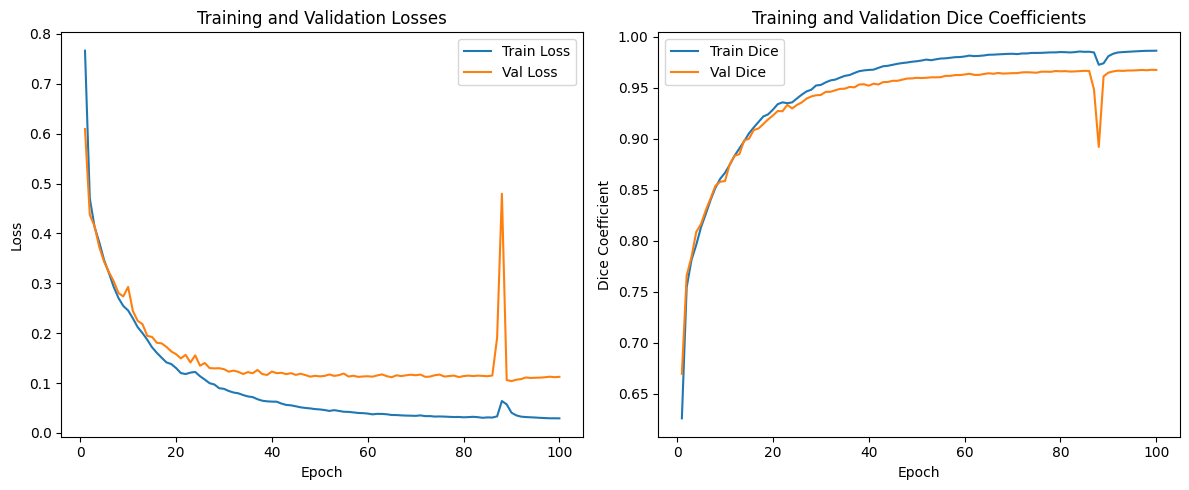

In [124]:
def to_numpy(tensor):
    # Move tensor to CPU and convert to NumPy array
    return tensor.cpu().detach().item()

def plot_metrics(metrics):
    num_epochs = len(metrics['train_losses'])
    epochs = np.arange(1, num_epochs + 1)

    # Convert tensors to NumPy arrays
    train_losses_np = metrics['train_losses']
    val_losses_np = metrics['val_losses']
    train_dices_np = [to_numpy(dice) for dice in metrics['train_dices']]
    val_dices_np = [to_numpy(dice) for dice in metrics['val_dices']]

    # Plot Losses
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses_np, label='Train Loss')
    plt.plot(epochs, val_losses_np, label='Val Loss')
    plt.title('Training and Validation Losses')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Plot Dice Coefficients
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_dices_np, label='Train Dice')
    plt.plot(epochs, val_dices_np, label='Val Dice')
    plt.title('Training and Validation Dice Coefficients')
    plt.xlabel('Epoch')
    plt.ylabel('Dice Coefficient')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_metrics(metrics)

In [125]:
import matplotlib.pyplot as plt
import numpy as np

def to_numpy(tensor):
    # Move tensor to CPU and convert to NumPy array
    return tensor.cpu().detach().numpy()

def threshold_prediction(predicted, threshold=0.5):
    # Threshold predicted values
    predicted[predicted < threshold] = 0
    predicted[predicted >= threshold] = 1
    return predicted

def plot_subplots(image, mask, predicted, threshold=0.5):
    # Convert tensors to NumPy arrays
    image_np, mask_np, predicted_np = map(to_numpy, (image, mask, predicted))

    # Threshold the predicted values
    predicted_np_thresholded = threshold_prediction(predicted_np, threshold)

    fig, axes = plt.subplots(1, 3, figsize=(10, 5))  # Adjust figsize as needed

    # Plot Image, Mask, Predicted, and Thresholded Predicted
    titles = ['Image', 'Mask', 'Predicted']
    for ax, data, title in zip(axes, [image_np, mask_np, predicted_np, predicted_np_thresholded], titles):
        ax.imshow(data.squeeze(), cmap='gray' if 'Mask' in title else 'gray')
        ax.set_title(title)
        ax.axis('off')

    plt.show()

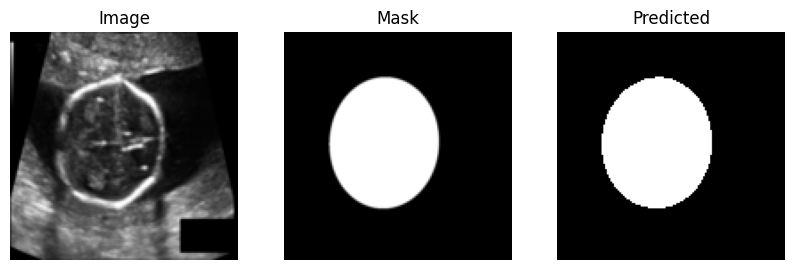

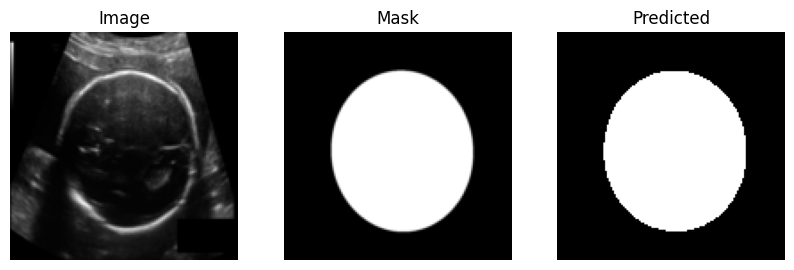

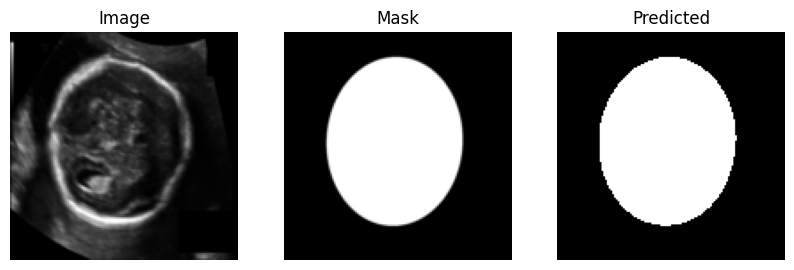

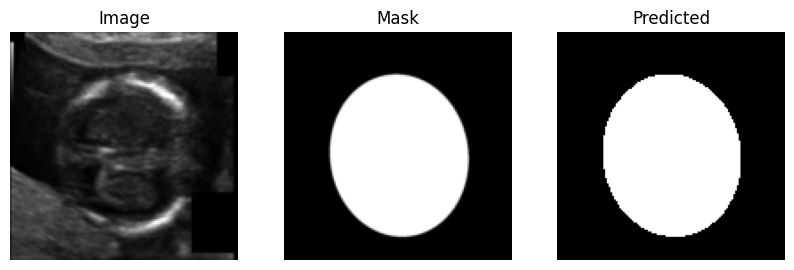

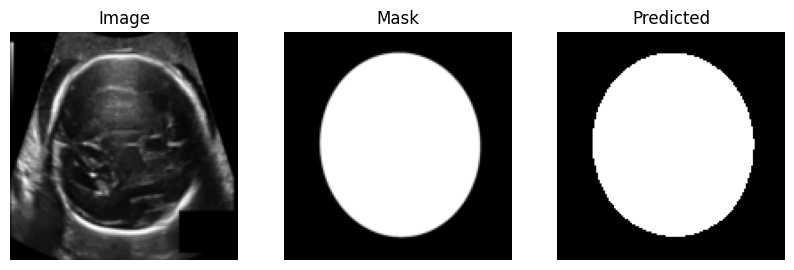

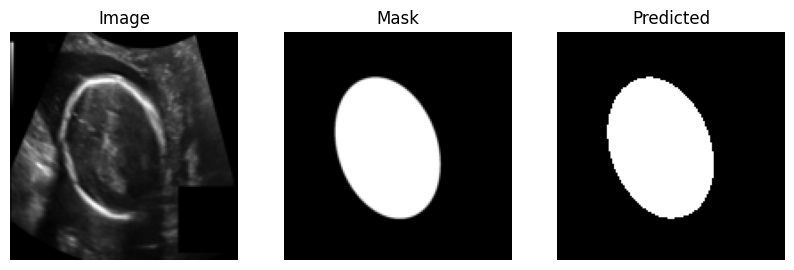

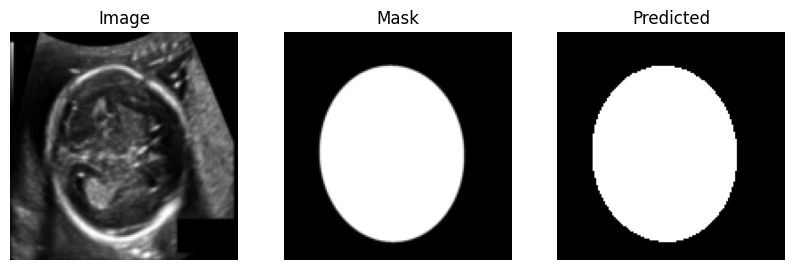

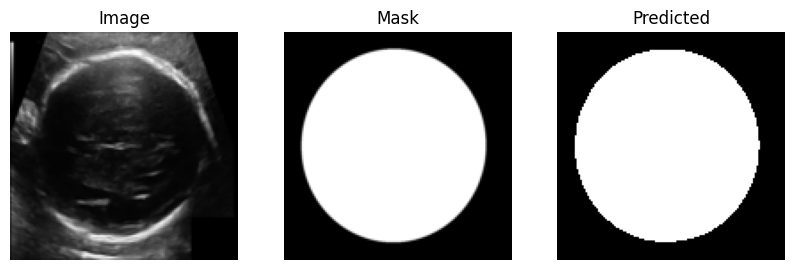

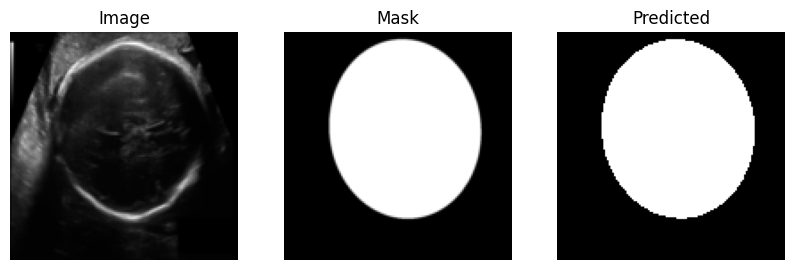

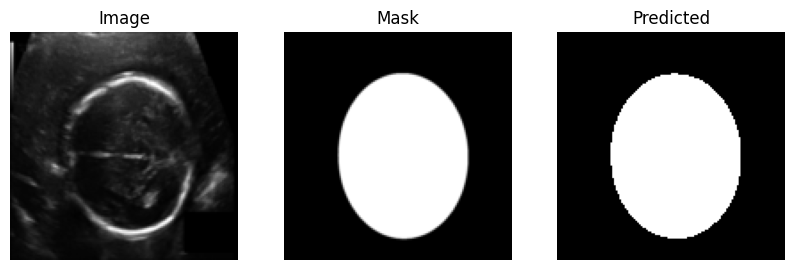

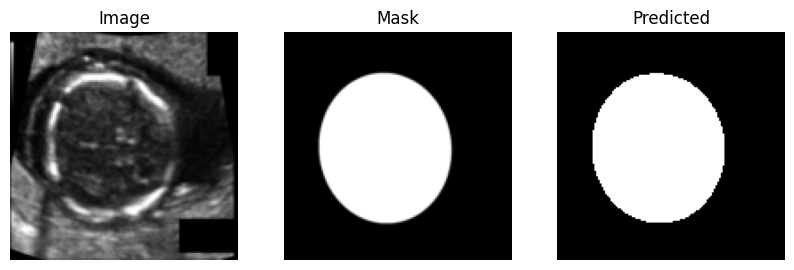

In [126]:
for i in [2, 3, 11, 20, 55, 67, 87, 98, 120, 130, 200]:
    image = train_dataset[i][0]
    mask = train_dataset[i][1]
    im = image.to(device)
    pred = unet(im.unsqueeze(0))
    pred = pred.squeeze()

    plot_subplots(im, mask, pred)